### Seun Oloruntoba Project - AllLife Bank 

## Description
Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help


## Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


## Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).


## Data Dictionary
Sl_No: Primary key of the records
Customer Key: Customer identification number
Average Credit Limit: Average credit limit of each customer for all credit cards
Total credit cards: Total number of credit cards possessed by the customer
Total visits bank: Total number of visits that customer made (yearly) personally to the bank
Total visits online: Total number of visits or online logins made by the customer (yearly)
Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)
 

In [80]:
#Libraries for PCA
from sklearn.decomposition import PCA

import seaborn as sns

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# for Hierachial Agglomerative Clustering 
from sklearn.cluster import AgglomerativeClustering 

# to calculate cophenet, and dendogram 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

#Pairwise distribution between data points
from scipy.spatial.distance import pdist  

import warnings
warnings.filterwarnings('ignore')

In [81]:
# loading the dataset
data = pd.read_excel("Credit+Card+Customer+Data.xlsx")
data.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [82]:
#To understand the number of Observations and features under review
data.shape

(660, 7)

### Observations
The dataset has 660 rows  and 7 columns

In [83]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


In [84]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [85]:
# dropping the Sl_No and Customer Key as the coulumn does not provide any information
df.drop("Sl_No", axis=1, inplace=True)
df.drop("Customer Key", axis=1, inplace=True)

In [86]:
df.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


In [87]:
#To get additional information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


### Observation
1. All the features have the correct datatype of intergers 

2. All the data are numerical variable 

3. No missing values in the data


In [88]:
#To understand the data statistics 
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


### Observation
1. Avg_Credit_Limit average is 34574 and the difference between the 75% and maximum values shows there may be some outliers but we would investgate this later 

2. All other data features looks good but this would be investigate further


In [89]:
#To check those that have zero Total_visit_bank
df[(df.Total_visits_bank == 0)].describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,100.000000,100.000000,100.0,100.000000,100.000000
mean,39150.000000,3.540000,0.0,5.030000,5.820000
std,56004.035749,2.698372,0.0,3.616614,3.085908
min,3000.000000,1.000000,0.0,1.000000,0.000000
25%,9000.000000,2.000000,0.0,3.000000,4.000000
50%,14000.000000,3.000000,0.0,4.000000,6.000000
75%,20000.000000,4.000000,0.0,5.000000,8.000000
max,200000.000000,10.000000,0.0,15.000000,10.000000


### Observation
There are about 100 customers who never visited the bank, who had zero visit to banks, but they had minimum of 1 online visit, which means those who never visit the bank actulally visit online. 

In [90]:
#To check those that have zero Total_visits_online, 
df[(df.Total_visits_online == 0)].describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,144.000000,144.000000,144.000000,144.0,144.000000
mean,35131.944444,5.534722,3.506944,0.0,2.069444
std,22971.324943,1.211329,1.176676,0.0,1.475453
min,5000.000000,4.000000,2.000000,0.0,0.000000
25%,13750.000000,4.000000,2.000000,0.0,1.000000
50%,35000.000000,6.000000,3.500000,0.0,2.000000
75%,56000.000000,7.000000,5.000000,0.0,3.000000
max,75000.000000,7.000000,5.000000,0.0,4.000000


### Observation 
There are 144 customers who never visited online but they have minimum of 2 visit to banks which means those who never contacted online actually visited the bank at a minimum of two visits  actually 

In [91]:
#To check those that have zero Total_calls_made, 
df[(df.Total_calls_made == 0)].describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,97.000000,97.000000,97.000000,97.000000,97.0
mean,54536.082474,5.979381,2.989691,2.587629,0.0
std,50142.725847,1.707699,1.510345,4.094591,0.0
min,6000.000000,2.000000,0.000000,0.000000,0.0
25%,16000.000000,5.000000,2.000000,0.000000,0.0
50%,41000.000000,6.000000,3.000000,1.000000,0.0
75%,70000.000000,7.000000,4.000000,2.000000,0.0
max,200000.000000,10.000000,5.000000,15.000000,0.0


### Obervation 
There are 97 customers who never made a call and there are people who never made a call, never contact online and never visited the bank based on the fact that the minimum was zero in all the three

# Exploratory Data Analysis(EDA)

### Univariate Analysis

In [92]:
# function to plot a boxplot and a histogram.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

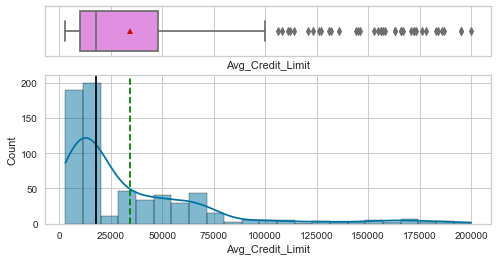

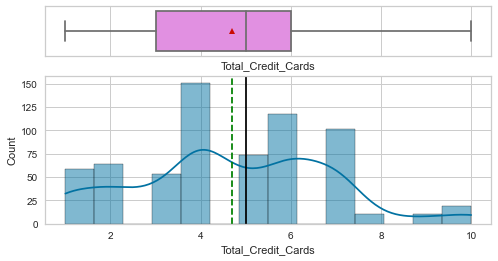

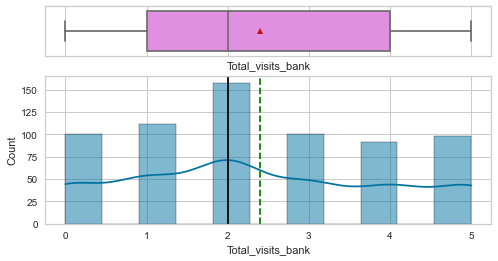

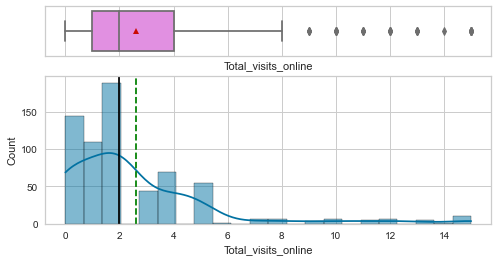

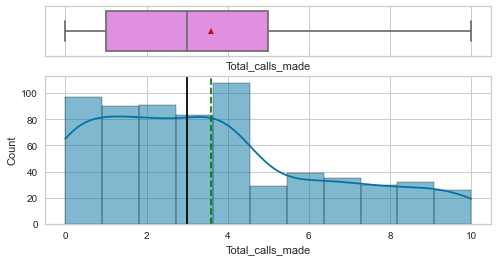

In [93]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item, kde=True, figsize=(8, 4))

### Observation: 
1. The Average Credit Limit has outliers but this is normal as the credit limits of different customers differs based on their income and several factors, so we retain the outliers. Also, the average credit limit is rightly skewed.


2. The highest total credit card was 4 and the mean was around 5.


3. The highest total visit to bank was about 2 visits after which the visit reduces, from this it seems customers visit the bank to resolve their issues but after 2 vists they begin to reduce it. 


4. The Average online visit was approx. 3, the histogram is skewed to the right and the highest frequency of vist was at approx. 2 online visit after which it continues to reduce. The maximum and distinct number of online visit was higher than other forms of contacts, maybe because people can easily access online anywhere. Also there are outliers but we would retain this because online visit differs based on age and interest.


5. The highest call made was approx. 4 after which it continues to reduce, the histogram is rightly skewed.

In [94]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

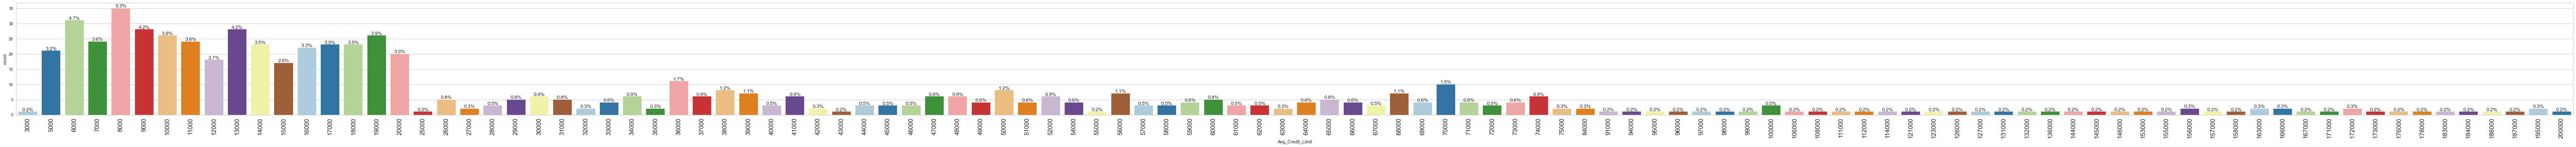

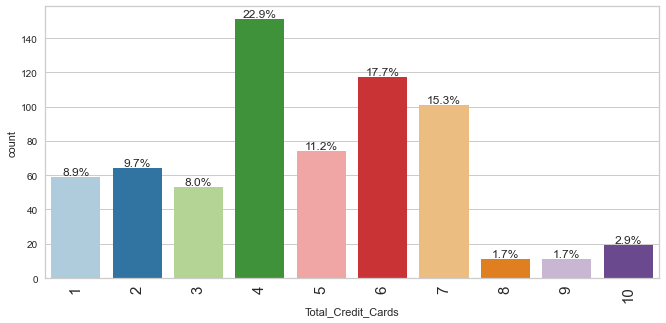

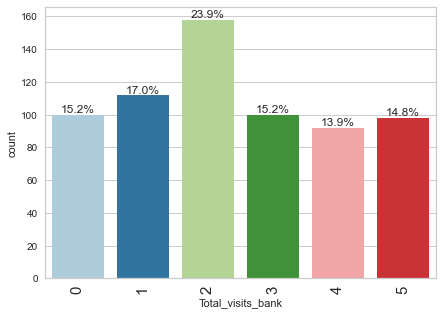

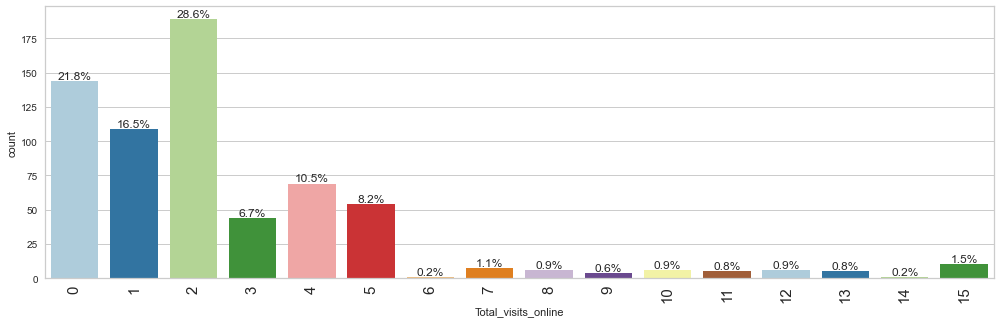

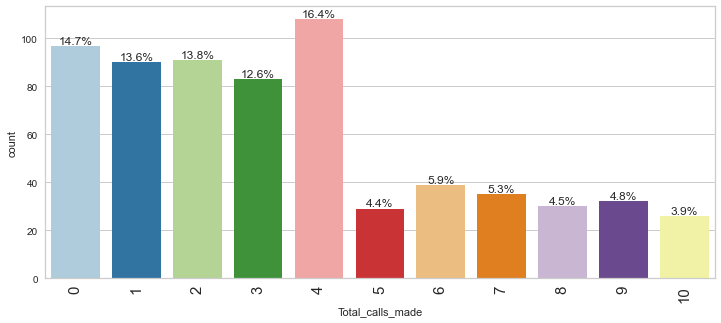

In [95]:
for item in num_col:
    labeled_barplot(df, item, perc=True)

### Observation
1. The credit limit has so many unique value and the histogram percentage cannot easily interpret it very well


2. The highest credit card taken was 4 approx. 23% while 7 & 8 credit cards are the least approx. 2%


3. Highest number of visit to bank was 2 times and the least was 4 times


5. The highest online visit was 2 times and the least was 6 and 14 times approx. 0.2%


6. The highest calls made was 4 times  and the least was 10 times 


## Bivariate 

### Checking for Correlations

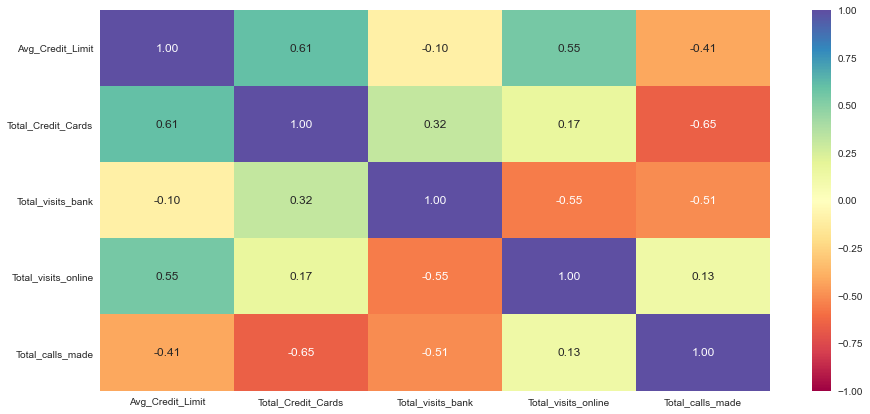

In [96]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations

1. Average credit Limit and Total Credit Card are somewaht correlated, this can be interpreted as the more credit limit someone has means the more income the customers has and the more cards he would want to have.

2. Total credit Cards and Total visit online are somewhat correlated,this can be interpreted as those that use online are able to research and brouse more on the advantages of different cards and therefore may take several cards.  

## Pair Plot

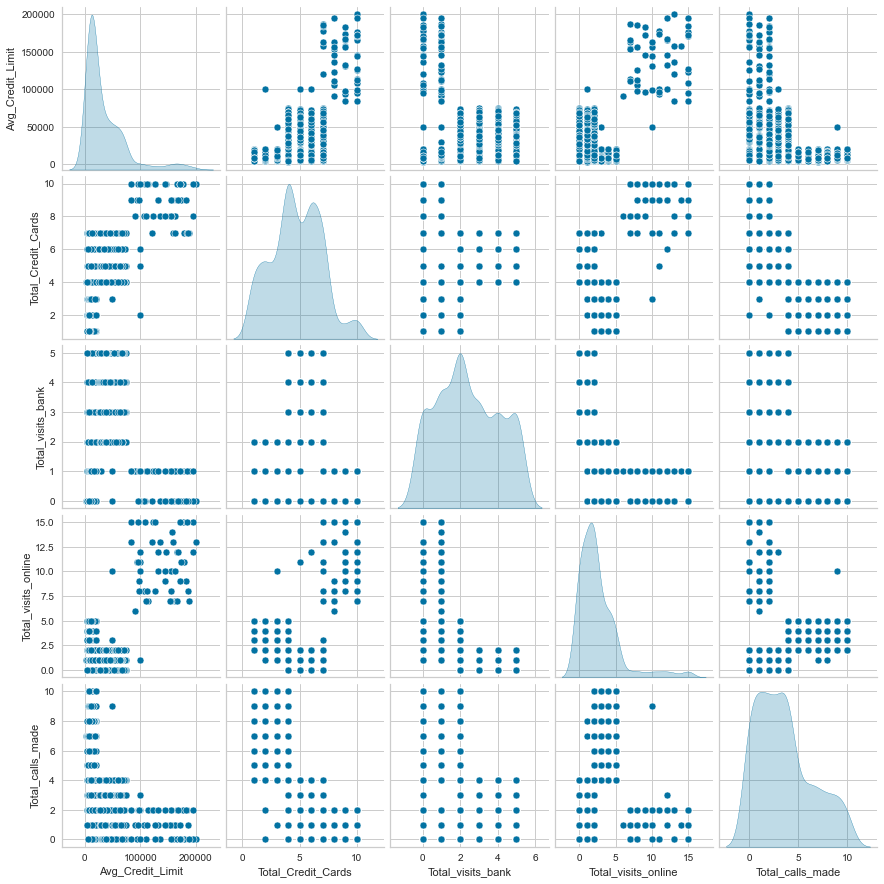

In [97]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

## Data Pre-Processing 

### Feature engineering - those feature that had no impact has been removed

### Missing Value Treatement - From the analysis there are no missing values

### Outlier Treatment - The outliers would be retain as the two features with outliers are acceptable based on domain knowledge 



In [98]:
#Duplicate Observation Check
df.duplicated().sum()

11

In [99]:
#Extracting duplicated rows
df.loc[df.duplicated(), :]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


In [100]:
# Extracting the full duplicates 
df.loc[df.duplicated(keep= False), :]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
17,8000,2,0,3,4
29,8000,4,0,4,7
56,6000,1,0,2,5
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
250,18000,6,3,1,4
252,9000,4,5,0,4
257,10000,6,4,2,3
295,10000,6,4,2,3


In [101]:
#Dropping the duplicates 
df = df.drop_duplicates()

## Observation 
The number of rows has reduced from 660 to 649 after the 11 duplicates were removed. 

In [102]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [103]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443
1,0.400209,-0.786701,-1.476410,2.499808,1.881237
2,0.400209,1.054846,-0.860606,0.127419,0.142526
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526
4,1.723499,0.594459,-1.476410,3.177634,-0.205216
5,-0.393766,-0.786701,-1.476410,-0.550407,1.533495
6,1.723499,0.134072,-1.476410,2.838721,-0.552958
7,-0.526095,-0.786701,-1.476410,-0.550407,-0.900701
8,-0.790753,-1.247087,-1.476410,-0.211494,-0.552958
9,-0.843684,-0.326314,-1.476410,-0.550407,1.185753


Number of Clusters: 1 	Average Distortion: 2.007896349270688
Number of Clusters: 2 	Average Distortion: 1.4576197022077821
Number of Clusters: 3 	Average Distortion: 1.1434401208195095
Number of Clusters: 4 	Average Distortion: 1.0435538595477063
Number of Clusters: 5 	Average Distortion: 0.9878677336058027
Number of Clusters: 6 	Average Distortion: 0.9402321120333815
Number of Clusters: 7 	Average Distortion: 0.9070353870946729
Number of Clusters: 8 	Average Distortion: 0.8866947411641738


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

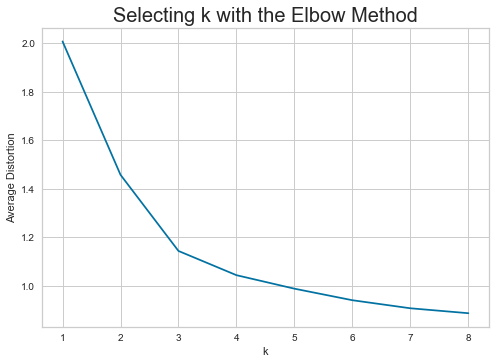

In [104]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

### Observation


##### The appropriate value of k from the elbow curve seems to be 3 or 4.

#### checking the silhouette scores.

For n_clusters = 2, silhouette score is 0.41800025566689647
For n_clusters = 3, silhouette score is 0.516281010855363
For n_clusters = 4, silhouette score is 0.3570238219413198
For n_clusters = 5, silhouette score is 0.2722848313346344
For n_clusters = 6, silhouette score is 0.25710806235819067
For n_clusters = 7, silhouette score is 0.23521029986623004
For n_clusters = 8, silhouette score is 0.22651436291129146
For n_clusters = 9, silhouette score is 0.217669088211657


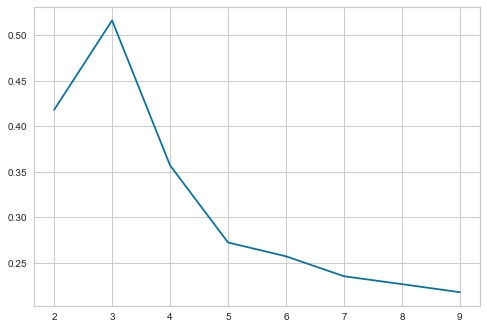

In [105]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

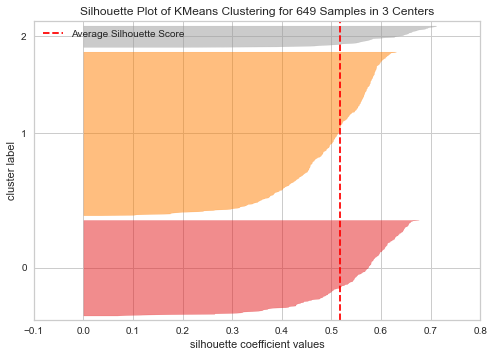

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [106]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

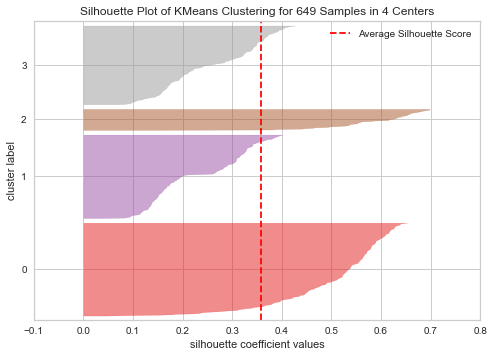

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [107]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

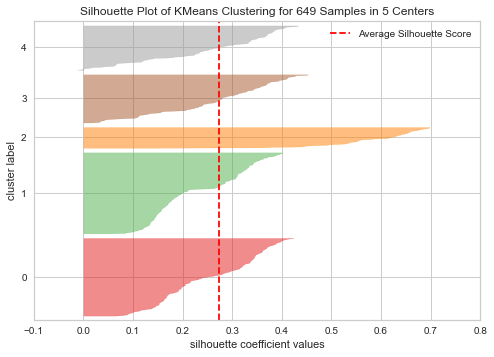

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [108]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

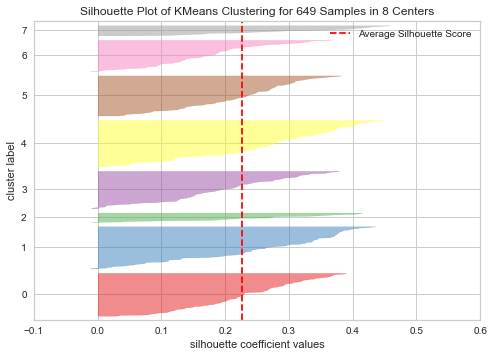

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [109]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

### Obsevration
Based on observation cluster 3 would be the best cluster based on the following factors,
Cluster_3 :
1. Has all silhouette score above average 

2. Has all silhouette score close to each other 

3. Has all silhouette scores approaching 1

4. Has the greatest thickness among the clusters

5. Has less flunctuation in the size of the cluster compared to others

6. Also there is a knick at 3 in the elbow curve



## Fitting the Model

In [110]:
#Fitting with Kmeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [111]:
#Copy the data to a new dataframe
Df_KM = df[num_col].copy()

In [112]:
# adding kmeans cluster labels to the original dataframe
Df_KM["K_means_segments"] = kmeans.labels_

## Cluster Profiling

In [113]:
#Cluster_Profile grouping by K_Mean segment and calculating the mean
cluster_profile = Df_KM.groupby("K_means_segments").mean()

In [114]:
#Grouping by Total Credit Cards and counting 
cluster_profile["count_in_each_segments"] = (
    Df_KM.groupby("K_means_segments")["Total_Credit_Cards"].count().values
)

In [115]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,50
1,34071.428571,5.518519,3.484127,0.981481,1.992063,378
2,12239.819005,2.411765,0.945701,3.561086,6.891403,221


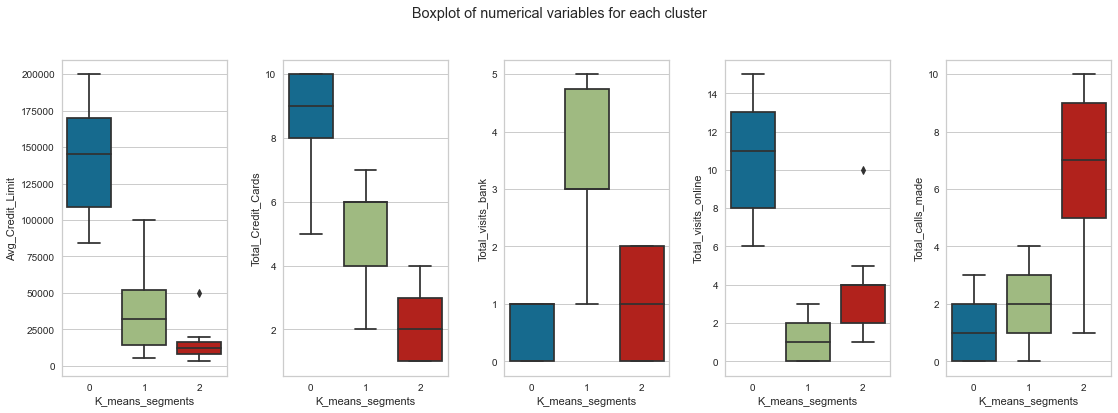

In [116]:
#Boxplot of the numerical varibles based on segmentation
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=Df_KM[num_col[counter]], x=Df_KM["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Customers Profiling
### Cluster_0
1. Average credit limit is very high, the top of the echelon

2. Total number of credit card owned is very high 

3. Vist to bank is very low (they hardly go to bank for to report issues)

4. Visit online is very high 

5. Total call made is very low 

And the total number in the segment is low

### Cluster_1
1. Average credit limit is moderate

2. Total number of credit card is moderate

3. Vist to bank is very high 

4. Visit online is very low 

5. Total call made is moderate

And the total number in the segment is very high 


### Cluster_2
1. Average credit limit is very low

2. Total number of credit card is very low

3. Vist to bank is low

4. Visit online is low

5. Total call made is very high

And the total number in the segment is high 

# Hierarchial Clustering 

In [117]:
#Modelling Hierarchial Clustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [118]:
#Fitting the model
model.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [119]:
#Copying to a new dataframe
Df_hr = df[num_col].copy()

In [ ]:
#Putting labels to aid grouping 
Df_hr['labels'] = model.labels_
Df_hr.head(10)

In [121]:
#Groupby Labels
Df_hr = Df_hr.groupby(['labels'])

In [122]:
#Calculating and groupng by mean
Df_hr.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,34000.000000,5.514512,3.480211,0.984169,1.997361
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12263.636364,2.404545,0.940909,3.568182,6.904545


In [123]:
# Calculating the cophenet index 

Z = linkage(subset_scaled_df, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

c

0.8974425535306298

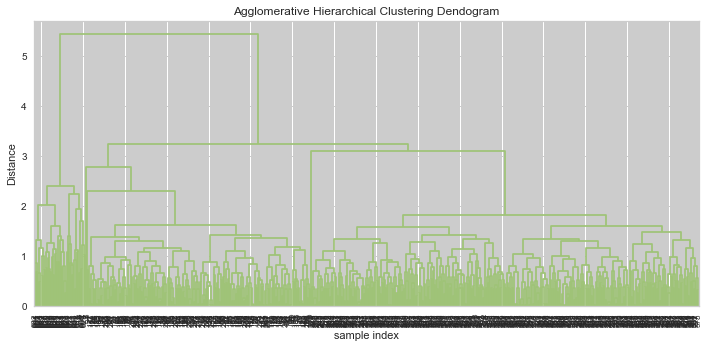

In [124]:
#Drawing the dendogram 
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [125]:
# Calculating the cophenet index 

Z = linkage(subset_scaled_df, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

c

0.8794736468795109

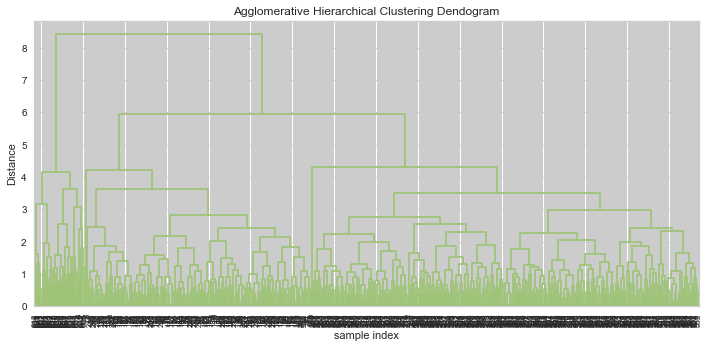

In [126]:
#Drawing the dendogram 
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [127]:
# Calculating the cophenet index 

Z = linkage(subset_scaled_df, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

c

0.7425813590948763

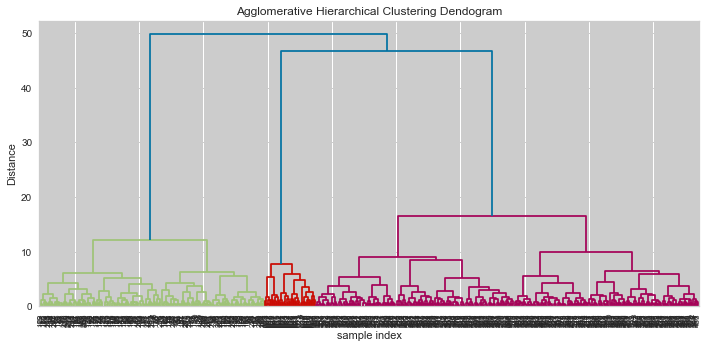

In [128]:
#Drawint the dendogram
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

### Observation on the Dendogram
1.Linkage when the method is average is the highest cophenetic index of 0.89 but the dendogram distance between the cluster is not so high compared to others, but we can cut the line across 3 clusters, evene though the distance of the thrid cluster is small. 

2.Linkage when the method is complete is also high with cophenetic index of 0.88 and the dendogram looks much better, cutting 3 clusters clearly in the place of highest distance.

3.Linkage when the method is ward is the lowest with cophenetic index of 0.74 but the dendogram looks the best cutting 3 clusters at highest level of distance.

Three (3) clusters looks like the best cluster based on the above information


## Cluster Profiling 
### 1. Cluster_0 
 Average credit limit low (They are moderately low income customers)
 
 Total Credit Card moderate (Number of credit card moderate)
 
 Total visit to bank very high ( They visit bank a lot)
 
 Total visit online very low (They hardly have online presence)
 
 Total call made low (They hardly made a call)
 
### 2. Cluster_1
 Average credit limit very high  (They are high income customers)
 
 Total Credit Card very high (They have higher number of different credit cards)
 
 Total visit to bank very low (They hardly visit bank)
 
 Total visit online very high (They contact bank more online)
 
 Total call made very low ( They hardly made calls)
 
### 3. Cluster_2
 Average credit limit very low ( They are low income customers)
 
 Total Credit Card very low ( Number of credit cards taken is low)
 
 Total visit to bank very low (They hardly visit bank, may likely be in remote village)
 
 Total visit online low (They hardly visit online as they are likely low income and in remote area)
 
 Total call made very high (The made a lot of calls, in re,ote places they can easily call)

## Compare Clusters from K_Mean and Hierachial Clustering 

### Cluster_0 of K_Mean is similar to Cluster_1 of Hierachial clustering which has the following profiling: 

1. Customers are high income earners with very high average credit limit which may have been given to them because of their higher financial profile.

2. The customers have higher numbers of different credit cards, this may be due to the fact that they have higher income they are ready to explore different credit cards and there benefits and the bank is ready to give them the cards as well. 

3. The customers hardly visit bank or make calls to report issues but they as they would rather use the online platform to resolve their issues

Overall this cluster contains the upper class in the society

### Cluster_1 of K_Mean is similar to Cluster_0 of Hierachial clustering which has the following profiling: 
1. Customers are middle class income earners with moderate credit limit which they would have been approved for because of their financial capacity. 

2. The customers in this cluster have several numbers of credit cards but lesser than the previous cluster, this is understandable because the number of credit cards the customers would be approved would depend on the financial capacity.

3. The customers in this cluster visit banks a lot, which means they are living in the areas which are closer to bank but not too bouyant to have signifcant presence or usage of technology and they hardly make calls since they live closer to banks and would prefer their issues are resolved quickly. They do not make calls or use online to resolve issues they prefer physical visit.

Overall this cluster contains the middle class in the society 

### Cluster_2 of K_Mean is similar to Cluster_2 of Hierachial clustering which has the following profiling: 
1. Customers are lower class income earners with low credit limit compared to the other two clusters, this is because credit limits are approved based on the income of the customers. 

2. The customers in this cluster have the lowest number of different credit cards and this cannot be unconnected with their financial status which was low. 

3. The customers in this cluster hardly visit bank to resolve issues, this may be unconnected with the fact that their houses may be far from where banks are located, likely more in remote areas, they may also not be so literate and are not use to online means of resolving issues but they are the clusters that use the calls the most as calls is what they use the most due to remote locations. 

Overall this cluster contains the low class in the society 


## Actionable Insights & Recommendations

## Actionable Insights
The model was able to identify three clusters with distinct characteristics; 

1. The upper class with high income, this class have several numbers of credit cards and would rather use the online to resolve their issues because they have much access to technology and internet

2. The middle class with mid income status, moderate numbers of credit card and would rather visit the bank than use online or calls to resolve issues 

3. The lower class with low finacial capacity  which would rather call than visit or use online means to resolve issue.

## Recommendations : 
### Recommendation for Cluster_0 Recommendation (Upper Class Customer) : Considering the profile of the cluster these are some of the recommendations: 
1. Since these are customers that are like premium and are use online, the first recommendation is to develop a survey to understand how to better market to and service them and use the feedback to decide on product to market to them. 

2. Have a dedicated online platform for this cluster to resolve any issue they may have, since they prefer to use online and are premium customers every effort and investment required to make the online experience seamless.

3. This cluster have an average of 8 different cards, this should be reviewed to reduce the number of credit cards that these customers carry around, more features of different cards can be added to fewer cards

4. Since Online engagement is the best that organization prefers, so there is no need to change their prefer means of contacting the Bank 


### Recommendation for Cluster_1 Recommendation (Middle Class Customer) : Considering the profile of the cluster these are some of the recommendations: 

1. These customers are middle class customers and therefore more effort should be geared towards improving on their credit limit, improving this may help them the more as the difference between their average limit with the upper class is very high

2. This cluster can be further broken down to identify those that have high financial capacity and give more credit line to them 

3. This cluster prefer to visit the bank, this may put pressure on the bank customers, the bank can think of establishing sattelite e-banking centres closer to their neighbourhood also the bank may also confirm if it was because issues are not resolved early online and calls maybe the reason why the people prefer to come online. 

4. Also, the bank can also try to shift them towards calling the call centre or online by giving them incentives when they use online or call centre like points etc

### Recommendation for Cluster_2 Recommendation (Low Class Customer) : Considering the profile of the cluster these are some of the recommendations: 
1. These customers have less financial capability and they are the lowest, credit card limit may not be increased but rather find a way to encourage them to use the credit card.

2. This cluster prefers to call, since this is better than visiting bank, the main thing is to find out their experiences through reviewing the recorded conversations or call logs and be sure their issues are resolved timely, else they may also start visiting the bank.

3. Review the number of customer service receiving calls to validate if they are sufficient and that there are variety of of required languages, esle  in the customer service centres and trained with local languages and most prevalent languages to help the customers, since many of them may be locals

4. Is like the bank is far away from them, is better some small remote banks are eastablished closer to them. 